# Visor de resultados

### Importaciones y funciones

In [3]:
import numpy as np
import os
import PIL
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from datetime import datetime
from sklearn.metrics import classification_report


C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [9]:
def metricasCM(matriz):
    # Bien clasificados sobre columna / De todas las X clasificadas solo el %  fue correcto
    metrica1= []
    # Bien clasificados sobre la fila / De todas las que deberías ser clasificadas como X solo el % fue corrcto 
    metrica2= []
    for j in range(0,5):
        suma=0
        for i in range(0,5):
            suma=suma+matriz[i][j]
        metrica1.append((matriz[j][j]/suma).round(2))
        metrica2.append((matriz[j][j]/sum(matriz[j])).round(2))
    print("De todas las X clasificadas solo el %  fue correcto",metrica1)
    print("De todas las que deberían ser clasificadas como X el % fue corrcto ",metrica2)

### Carga del modelo y datos de prueba

In [15]:
# Cargar dataset
directory="E:/TesisMA/Datos/DataCombinada"
modelo = 'E:/TesisMA/Modelos/512/Best_Modelo5_512_5_convdroput_x1_lr0005'

#Setting de parametos
img_height=512
img_width=512
batch_size = 32

#Cargar modelo
model = tf.keras.models.load_model(modelo)

#Crar dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))



Found 6774 files belonging to 5 classes.
Using 1354 files for validation.


### Resumen de la arquitectura de la red

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 512, 512, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)     

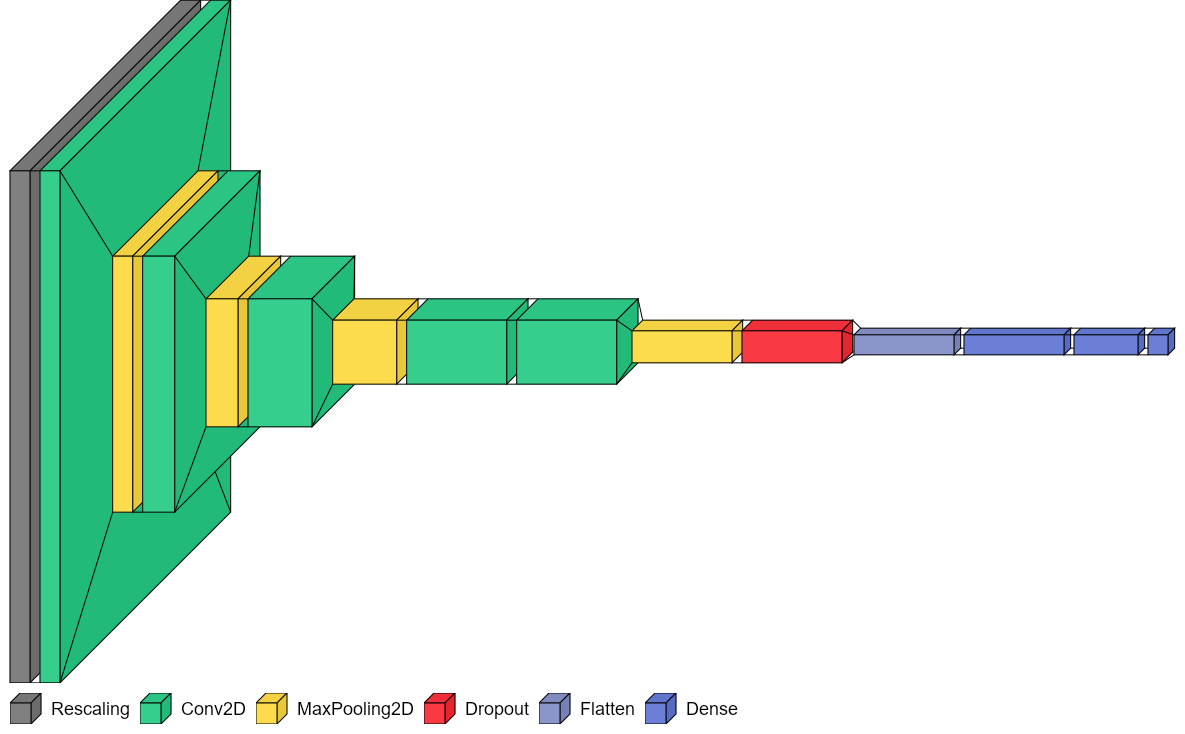

In [17]:
import visualkeras
from PIL import ImageFont
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D, Rescaling
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Rescaling]['fill'] = 'gray'
color_map[Conv2D]['fill'] = (53,206,141)
color_map[MaxPooling2D]['fill'] = (252,220,77)
color_map[Dropout]['fill'] = (249,57,67)
color_map[Flatten]['fill'] = (139,149,201)
color_map[Dense]['fill'] = (106,127,213)

font = ImageFont.truetype("arial.ttf", 18)
visualkeras.layered_view(model, legend=True, font=font, color_map=color_map, scale_xy=1, scale_z=1, max_z=100,type_ignore=[Sequential])

### Matriz de confusión para el set de prueba

De todas las X clasificadas solo el %  fue correcto [0.8, 0.79, 0.6, 0.76, 0.59]
De todas las que deberían ser clasificadas como X el % fue corrcto  [0.77, 0.84, 0.62, 0.75, 0.51]
None
              precision    recall  f1-score   support

    bathroom       0.80      0.77      0.79       276
     bedroom       0.79      0.84      0.82       495
 dining_room       0.60      0.62      0.61       131
     kitchen       0.76      0.75      0.75       277
 living_room       0.59      0.51      0.55       175

    accuracy                           0.74      1354
   macro avg       0.71      0.70      0.70      1354
weighted avg       0.74      0.74      0.74      1354



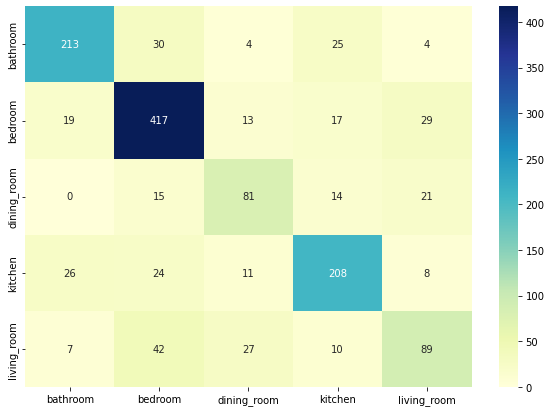

In [18]:
predictions = np.array([])
labels = np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])  
  labels= np.concatenate([labels, y])

class_names = val_ds.class_names

matriz = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
df_cm = pd.DataFrame(matriz, index = class_names, columns = class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu",  fmt='g');
print(metricasCM(matriz))
print(classification_report(labels, predictions, target_names=class_names))

In [19]:
report = model.evaluate(val_ds,return_dict=True)
index=["Values"]
table=pd.DataFrame(report,index=index) 
table

43/43 [==============================] - 32s 726ms/step - loss: 0.8779 - accuracy: 0.7445


,loss,accuracy
Values,0.8779,0.744461


### Validación de instancias especificas

[1]
[[0.   0.81 0.   0.   0.19]]
This image most likely belongs to bedroom with a 81.00 percent confidence.


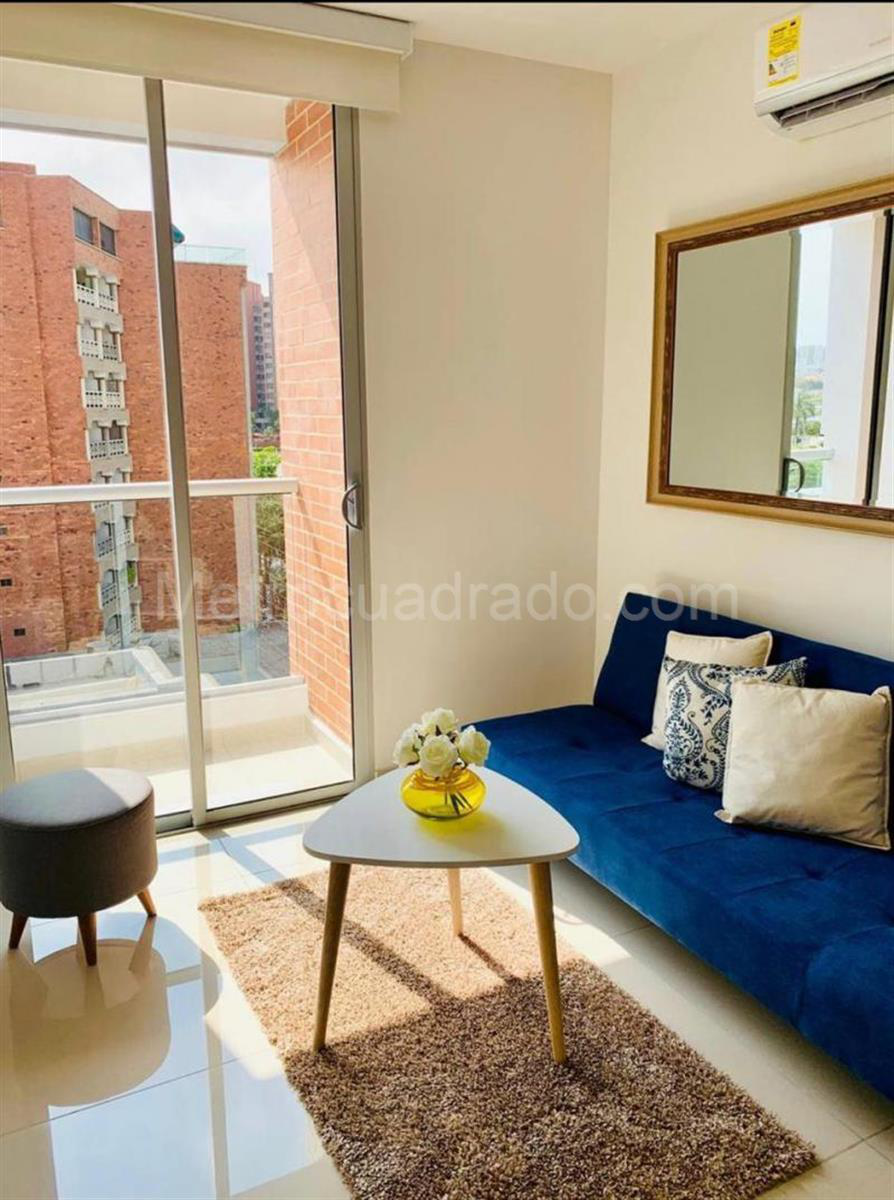

In [14]:
ruta = "E:/TesisMA/Datos/DataPrueba/Apartamento3767/living_room/Apartamento3767_12.jpg"
img = keras.preprocessing.image.load_img(ruta
    , target_size=(512, 512)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
    
predictions = np.argmax(model.predict(img_array), axis=-1)
predictions1 = model.predict(img_array).round(2)
print(predictions)
print(predictions1)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions1)], 100 * np.max(predictions1))
)
PIL.Image.open(ruta)